In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Visualiza dado da viagem 1 (verão)

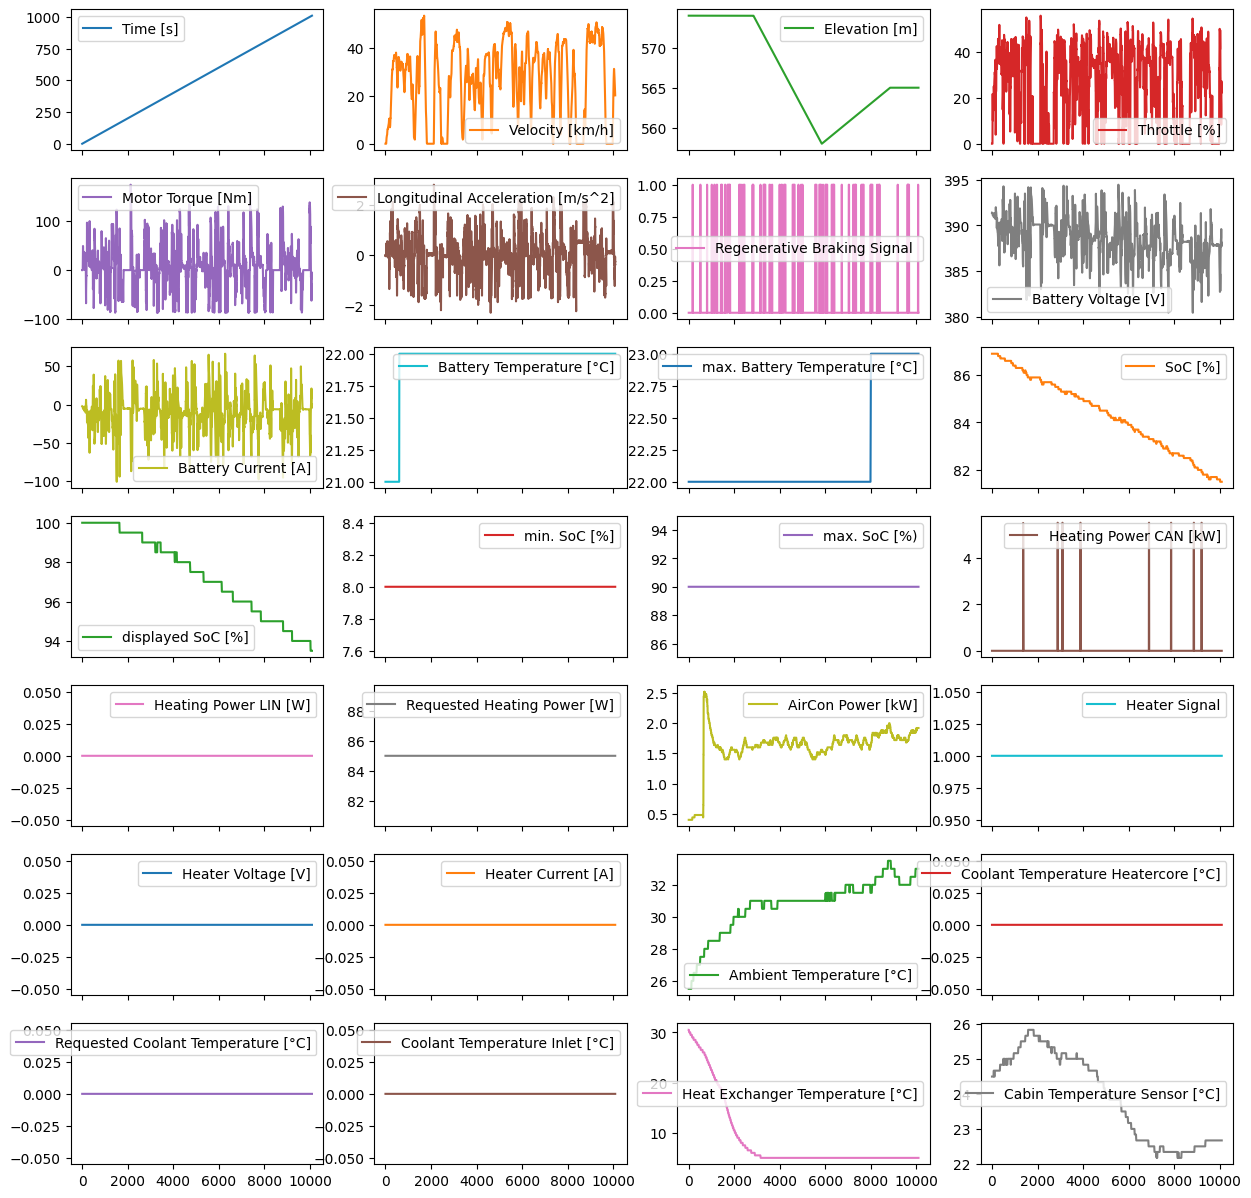

In [84]:
inputTrip = ".\dataset\TripA01"
dataTrip1 = pd.read_csv(f"{inputTrip}.csv",sep=";", encoding='unicode_escape')
dfTrip1   = pd.DataFrame(dataTrip1)
display(dfTrip1)
print(dfTrip1.describe())
_ = dfTrip1.plot(subplots=True, layout=(7,4), figsize=(15,15))

# Visualiza dado da viagem 1 (inverno)

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,449.0,0.0,0.0,-0.32930,0.0,388.8,-19.06128,7.0,...,9.30159,8.42878,7.73053,8.07965,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
1,0.1,0.0,449.0,0.0,0.0,-0.32930,0.0,388.8,-19.06128,7.0,...,9.30159,8.42878,7.73053,8.07965,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
2,0.2,0.0,449.0,0.0,0.0,-0.35800,0.0,388.8,-18.86127,7.0,...,9.30159,8.42878,7.73053,8.09595,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
3,0.3,0.0,449.0,0.0,0.0,-0.35235,0.0,388.8,-18.69031,7.0,...,9.30159,8.43463,7.75394,8.13086,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
4,0.4,0.0,449.0,0.0,0.0,-0.34367,0.0,388.8,-18.64031,7.0,...,9.30159,8.44336,7.78885,8.16577,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32513,3251.3,0.0,476.0,0.0,0.0,-0.34117,0.0,373.6,-3.60209,15.0,...,23.96490,24.92357,38.01868,36.18433,22.30655,22.13199,29.72549,27.71801,29.11452,28.24170
32514,3251.4,0.0,476.0,0.0,0.0,-0.30237,0.0,373.6,-3.50417,15.0,...,23.96490,24.92500,38.01724,36.18433,22.30655,22.13199,29.72549,27.71801,29.11452,28.24170
32515,3251.5,0.0,476.0,0.0,0.0,-0.37531,0.0,373.6,-3.40417,15.0,...,23.96490,24.92500,38.01724,36.18433,22.30655,22.13199,29.72549,27.71801,29.11452,28.24170
32516,3251.6,0.0,476.0,0.0,0.0,-0.36118,0.0,373.6,-3.40000,15.0,...,23.96490,24.92500,38.01724,36.18433,22.30655,22.13199,29.72549,27.71801,29.11452,28.24170


           Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
count  32518.000000     32518.000000   32518.000000  32518.000000   
mean    1625.850000        42.945591     477.890774     29.624543   
std      938.728236        28.478525       5.296395     18.378355   
min        0.000000         0.000000     449.000000      0.000000   
25%      812.925000        25.937020     478.060707     16.301407   
50%     1625.850000        42.723995     478.868270     33.400000   
75%     2438.775000        57.993015     480.000000     42.501465   
max     3251.700000       150.843750     481.999700     99.395730   

       Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
count       32518.000000                       32518.000000   
mean           11.548483                           0.005745   
std            43.260360                           0.787401   
min           -87.040250                          -3.034850   
25%            -3.500000                          -0.327572   


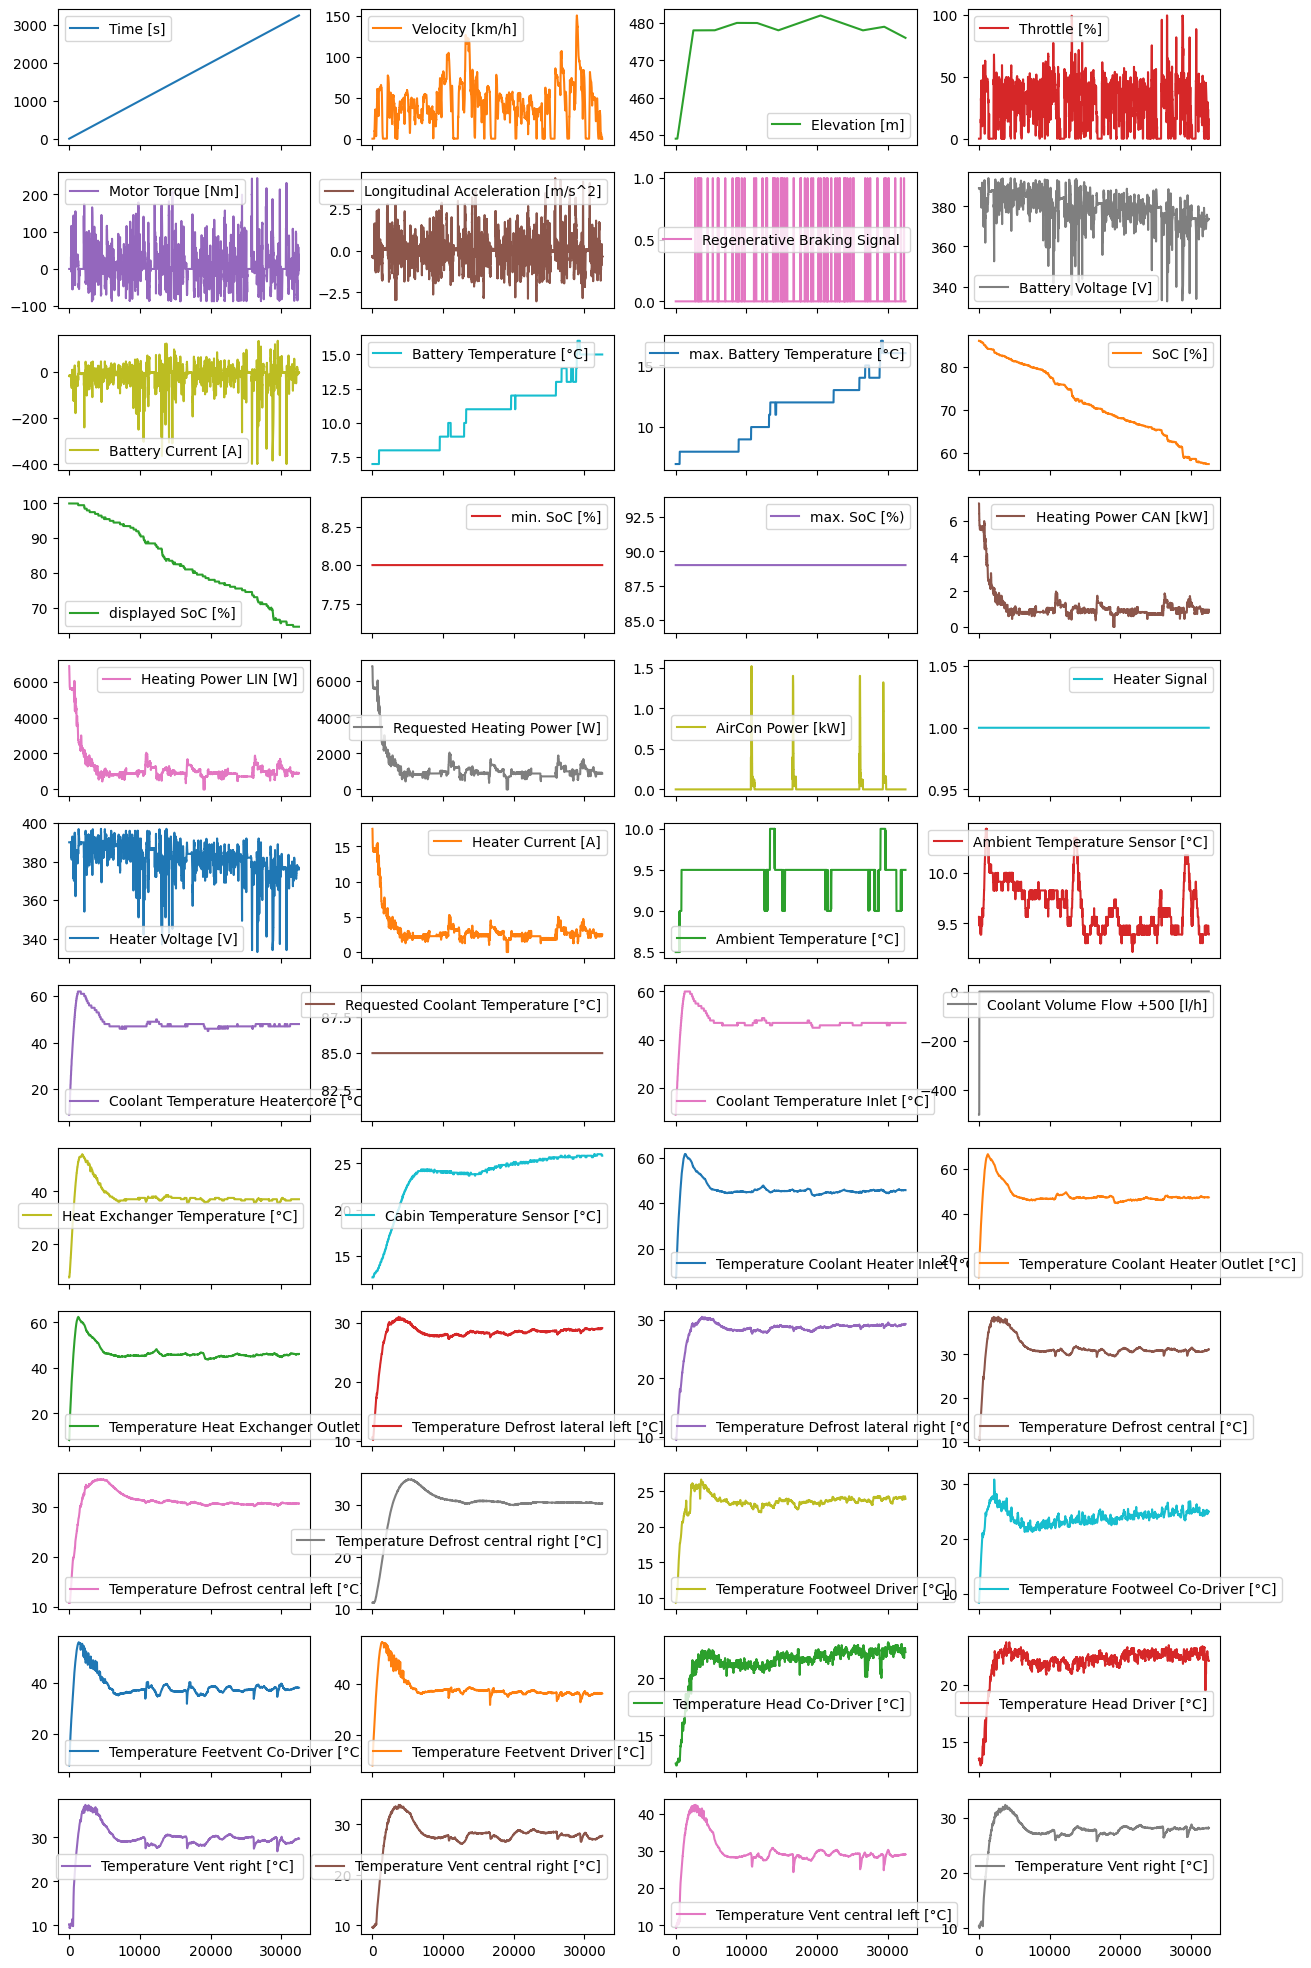

In [85]:
inputTrip = ".\dataset\TripB01"
dataTrip1 = pd.read_csv(f"{inputTrip}.csv",sep=";", encoding='unicode_escape')
dfTrip1   = pd.DataFrame(dataTrip1)
display(dfTrip1)
print(dfTrip1.describe())
_ = dfTrip1.plot(subplots=True, layout=(12,4), figsize=(15,25))

# Cria listas de datasset com mesmas características
Remove colunas que não estejam presentes em todos os datasets e remove colunas irrelevantes.

In [86]:
def conform_datasets(nbOfATrips, pathToAFiles, nbOfBTrips, pathToBFiles):
    dfSummerTrips = []
    col_list = []
    
    for i in range(0,nbOfATrips):
        dataTrip = pd.read_csv(f"{pathToAFiles}{(i+1):02}.csv", sep=";", encoding='unicode_escape') 
        dfSummerTrips.append(pd.DataFrame(dataTrip))
        if not col_list: 
            col_list = dfSummerTrips[i].columns.tolist()
        elif set(col_list)!= set(dfSummerTrips[i].columns.tolist()):
            diff = list(set(col_list)-set(dfSummerTrips[i].columns.tolist()))
            for item in diff:
                print(f"Discrepancy with TripA: {(i+1):02}")
                print(f"Removed >>{item}<< from columns list since it is not consistently present for all trips")
                col_list.remove(item)
    
    dfWinterTrips = []
  
    for i in range(0,nbOfBTrips):
        dataTrip = pd.read_csv(f"{pathToBFiles}{(i+1):02}.csv", sep=";", encoding='unicode_escape') 
        dfWinterTrips.append(pd.DataFrame(dataTrip))
        if not col_list: 
            col_list = dfWinterTrips[i].columns.tolist()
        elif set(col_list)!= set(dfWinterTrips[i].columns.tolist()):
            diff = list(set(col_list)-set(dfWinterTrips[i].columns.tolist()))
            for item in diff:
                print(f"Discrepancy with TripB: {(i+1):02}")
                print(f"Removed >>{item}<< from columns list since it is not consistently present for all trips")
                col_list.remove(item)
    
    #-Now loop through the dataframes and remove those columns that are not present everywhere
    col_list.remove("min. SoC [%]")
    col_list.remove("max. SoC [%)")
    col_list.remove("max. Battery Temperature [°C]")
    col_list.remove("displayed SoC [%]")
    
    for i, trip in enumerate(dfSummerTrips):
        dfSummerTrips[i] = trip[col_list]
    for i, trip in enumerate(dfWinterTrips):
        dfWinterTrips[i] = trip[col_list]
    return col_list, dfSummerTrips, dfWinterTrips

pathA = ".\dataset\TripA"
pathB = ".\dataset\TripB"
consistent_cols, dfSummerTrips, dfWinterTrips = conform_datasets(nbOfATrips=32,pathToAFiles=pathA,nbOfBTrips=38,pathToBFiles=pathB)
print(dfSummerTrips[0].columns)
print(dfWinterTrips[0].columns)

Discrepancy with TripA: 03
Removed >>Heater Current [A]<< from columns list since it is not consistently present for all trips
Discrepancy with TripA: 03
Removed >>Heating Power LIN [W]<< from columns list since it is not consistently present for all trips
Discrepancy with TripA: 03
Removed >>Heater Voltage [V]<< from columns list since it is not consistently present for all trips
Discrepancy with TripA: 03
Removed >>Coolant Temperature Heatercore [°C]<< from columns list since it is not consistently present for all trips
Discrepancy with TripA: 03
Removed >>Coolant Temperature Inlet [°C]<< from columns list since it is not consistently present for all trips
Discrepancy with TripA: 21
Removed >>Requested Coolant Temperature [°C]<< from columns list since it is not consistently present for all trips
Discrepancy with TripB: 38
Removed >>Velocity [km/h]<< from columns list since it is not consistently present for all trips
Index(['Time [s]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque 

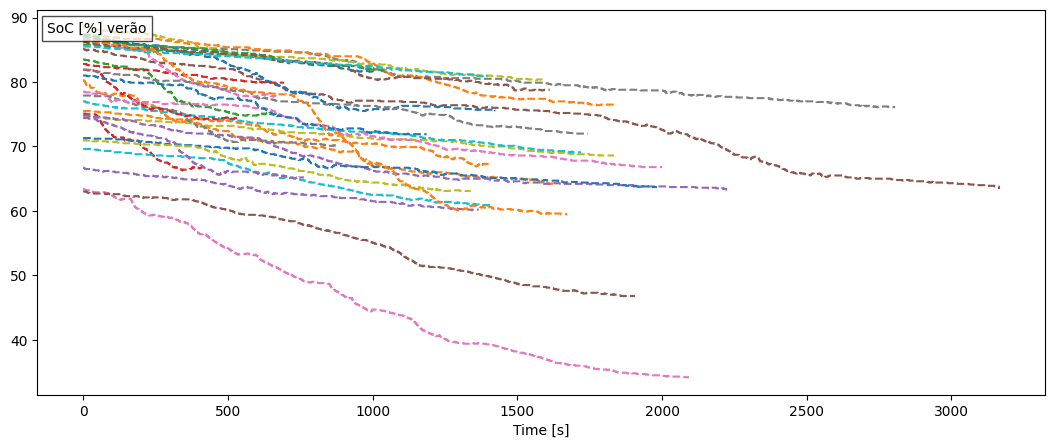

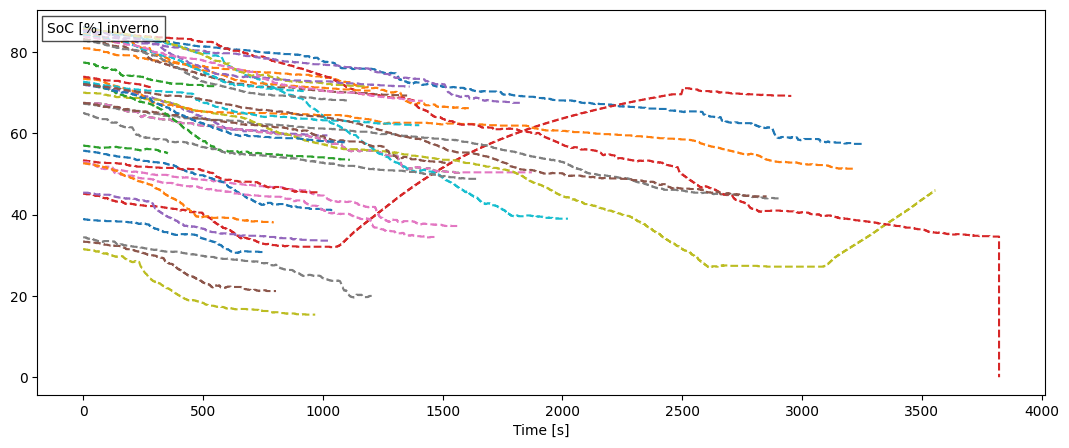

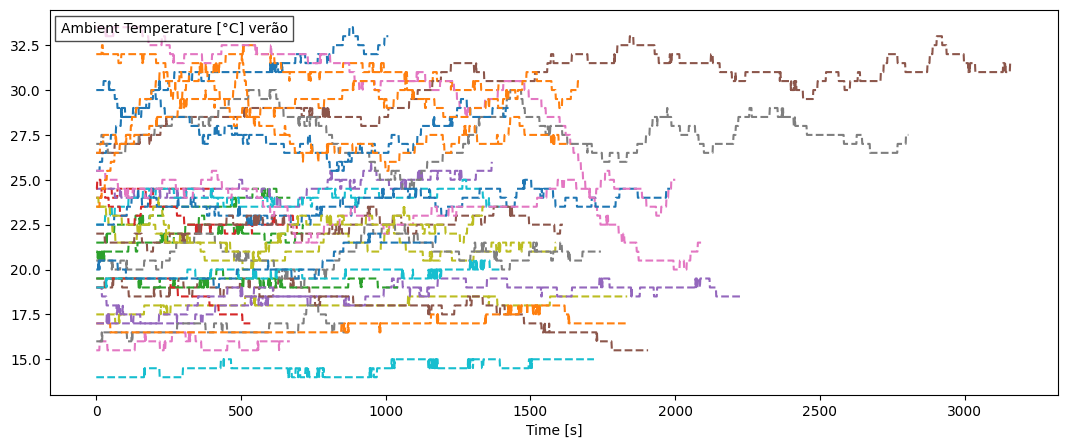

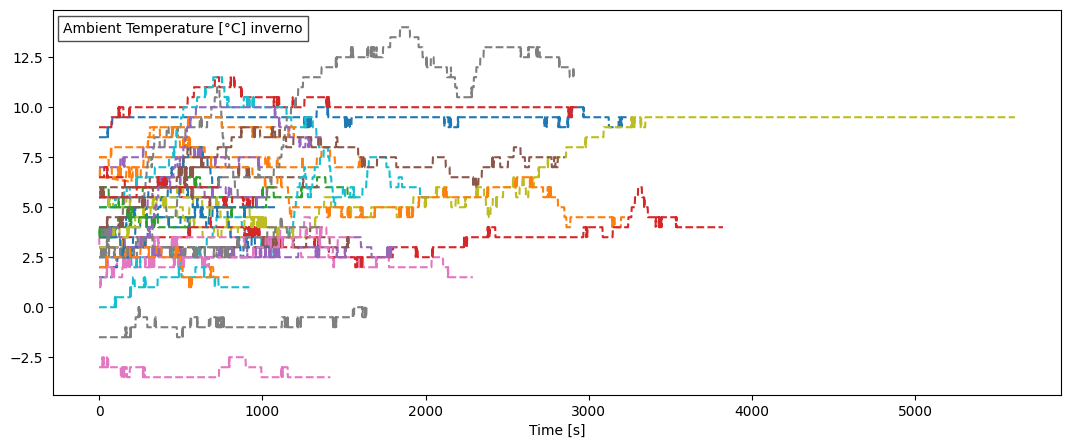

In [87]:
import matplotlib.pyplot as plt

def plot_feature_evolution(feature_name, df_list, title):
    fig, ax = plt.subplots(figsize=(13,5))
    for trip in df_list:
        trip.plot(x="Time [s]", y=[feature_name], ax=ax, ls="--")
        #dfSummerTrips[i][dfSummerTrips[i]["max. SoC [%)"]>89.7].plot(x="Time [s]", y=["SoC [%]"], ax=ax, ls="--", ylim=(0,100))
        #dfSummerTrips[i][dfSummerTrips[i]["Heater Signal"]==0].plot(x="Time [s]", y=["SoC [%]"], ax=ax, ls="--", ylim=(0,100))
    ax.legend().set_visible(False)
    ax.text(0.01, 0.97, title, transform=ax.transAxes, fontsize=10, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7))
    plt.show()
    
plot_feature_evolution("SoC [%]", dfSummerTrips, "SoC [%] verão")
plot_feature_evolution("SoC [%]", dfWinterTrips, "SoC [%] inverno")
    
plot_feature_evolution("Ambient Temperature [°C]", dfSummerTrips, "Ambient Temperature [°C] verão")
plot_feature_evolution("Ambient Temperature [°C]", dfWinterTrips, "Ambient Temperature [°C] inverno")

# Mantém features interessantes

In [88]:
def eliminate_features_list(df_list):
    for i in range(len(df_list)):
        df_list[i] = df_list[i][['Time [s]','Motor Torque [Nm]','Longitudinal Acceleration [m/s^2]','Battery Voltage [V]','Regenerative Braking Signal ',
                        'Battery Current [A]','Battery Temperature [°C]','SoC [%]']]
    return df_list

df_summer_list = eliminate_features_list(dfSummerTrips)
df_winter_list = eliminate_features_list(dfWinterTrips)

# Calcula média de algumas janelas

O conjunto de dados resultante tem uma linha para cada viagem. Cada linha contém uma média das características em num_windows=5 momentos diferentes da viagem.

In [89]:
def prepare_features(df_TripList, num_windows, dropNan=False):
    
    trips_list = []
    for i, trip_df in enumerate(df_TripList):
        
        newfeatures = []
        stepWidth = len(trip_df.index) // num_windows
        #print("Window size = ", stepWidth) 
        for i in range(0,num_windows):
            #-Sum the actions during a given time window (makes no  practical sense to do inference every 100ms in my view)
            averageVals = trip_df.iloc[i*stepWidth:(i+1)*stepWidth].sum() /(1.*stepWidth)
            featureList = averageVals.add_prefix('aw{i}-'.format(i=i+1)) 
            newfeatures.append(pd.DataFrame(featureList))
        trips_list.append( pd.concat(newfeatures).transpose() )
    
    return pd.concat(trips_list).reset_index().drop('index',axis=1)

df_summer = prepare_features(df_summer_list, num_windows=5) # 5 janelas
df_summer['label_is_winter'] = 0
#display(df_summer)
df_winter = prepare_features(df_winter_list, num_windows=5) # 5 janelas
df_winter['label_is_winter'] = 1
#display(df_winter)

df = pd.concat([df_summer, df_winter]).reset_index().drop('index',axis=1)
df

,aw1-Time [s],aw1-Motor Torque [Nm],aw1-Longitudinal Acceleration [m/s^2],aw1-Battery Voltage [V],aw1-Regenerative Braking Signal,aw1-Battery Current [A],aw1-Battery Temperature [°C],aw1-SoC [%],aw2-Time [s],aw2-Motor Torque [Nm],...,aw4-SoC [%],aw5-Time [s],aw5-Motor Torque [Nm],aw5-Longitudinal Acceleration [m/s^2],aw5-Battery Voltage [V],aw5-Regenerative Braking Signal,aw5-Battery Current [A],aw5-Battery Temperature [°C],aw5-SoC [%],label_is_winter
0,100.85,9.564792,0.009054,389.748053,0.103523,-11.778588,21.700704,86.384390,302.65,6.938345,...,83.251417,908.05,9.917522,0.164034,387.172800,0.059237,-13.204643,22.000000,82.083627,0
1,141.25,15.844151,0.016189,381.012024,0.094225,-41.592895,24.193850,77.647788,423.85,5.818535,...,70.401684,1271.65,12.851638,0.014657,379.621752,0.116143,-20.715046,25.673938,68.348231,0
2,67.00,11.000858,0.019448,388.256361,0.107524,-18.196107,24.000000,82.902975,201.10,26.164758,...,75.633893,603.40,-6.604497,-0.303281,386.539262,0.159187,3.003781,25.000000,74.939806,0
3,41.15,42.106881,0.678070,379.576784,0.000000,-71.126966,25.380995,74.398774,123.55,12.957294,...,67.397646,370.75,-6.289927,-0.338240,380.557864,0.203859,0.038920,27.000000,66.567476,0
4,136.60,5.165108,-0.050970,380.484596,0.149799,-10.871636,27.000000,65.914190,409.90,12.423977,...,61.787552,1229.80,6.092184,-0.052730,377.349744,0.138123,-7.585832,27.000000,60.572744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,73.30,7.118044,0.056060,384.375971,0.057069,-15.939775,11.000000,73.305521,220.00,20.905733,...,0.000000,660.10,9.500000,0.000000,381.700000,0.000000,-17.000000,11.000000,0.000000,1
66,136.20,14.032539,0.079516,386.067519,0.032661,-25.718125,11.000000,84.013985,408.70,22.369314,...,72.857383,1226.20,6.802639,-0.039930,383.431633,0.069879,-6.626723,13.000000,71.902026,1
67,285.15,9.402425,0.022554,378.526339,0.032609,-18.033873,6.000000,69.899222,855.55,12.763957,...,50.243462,2566.75,10.558058,-0.039739,364.779108,0.133492,-16.699343,9.579627,46.185074,1
68,141.65,18.550992,0.035342,385.137781,0.020769,-27.617816,8.882946,82.354252,425.05,16.065956,...,70.655946,1275.25,10.263807,-0.026461,379.090159,0.039012,-15.849425,10.000000,68.818913,1


# Separação entre características e rótulo e normalização

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def separate_and_normalize_features(df):
    X = df.drop(columns=['label_is_winter'])
    y = df['label_is_winter'].to_numpy()

    scaler = StandardScaler().fit(X)

    X_scaled = scaler.transform(X)
    
    return X_scaled, y

X,y = separate_and_normalize_features(df)

# Agrupamento com k-means

In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1, n_init="auto").fit(X)
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1])

# Acurácia na detecção da estação do ano

In [92]:
from sklearn.metrics import accuracy_score
print("Acurácia = ", accuracy_score(labels,y))

Acurácia =  0.8


# Variando o número de janelas

In [93]:
def prepare_data(df_summer_list, df_winter_list, num_windows):
    df_summer = prepare_features(df_summer_list, num_windows=num_windows) # 10 janelas
    df_summer['label_is_winter'] = 0
    df_winter = prepare_features(df_winter_list, num_windows=num_windows) # 10 janelas
    df_winter['label_is_winter'] = 1
    df = pd.concat([df_summer, df_winter]).reset_index().drop('index',axis=1)
    X,y = separate_and_normalize_features(df)
    return X,y

for num_windows in range(1,15,2):
    X,y = prepare_data(df_summer_list, df_winter_list, num_windows)
    kmeans = KMeans(n_clusters=2, random_state=1, n_init="auto", max_iter=1000).fit(X)
    labels = kmeans.labels_
    print("Acurácia ({i} windows) = ".format(i=num_windows), accuracy_score(labels,y))

Acurácia (1 windows) =  0.7857142857142857
Acurácia (3 windows) =  0.7857142857142857
Acurácia (5 windows) =  0.8
Acurácia (7 windows) =  0.8142857142857143
Acurácia (9 windows) =  0.8142857142857143
Acurácia (11 windows) =  0.8142857142857143
Acurácia (13 windows) =  0.8142857142857143


# Prepara pontos para p-Center

In [96]:
from pulp_solver import solve_pcenter_pulp

X,y = prepare_data(df_summer_list, df_winter_list, 5)
points = np.append(X,np.array([y]).T,axis=1)
points

array([[-0.62936912, -0.59394439, -0.44887072, ...,  0.83119815,
         1.19534925,  0.        ],
       [-0.17107451,  0.23988617, -0.39951401, ...,  1.39687514,
         0.5193341 ,  0.        ],
       [-1.01336102, -0.40325049, -0.37696964, ...,  1.29310872,
         0.84375173,  0.        ],
       ...,
       [ 1.46131645, -0.61550499, -0.35548385, ..., -1.08116907,
        -0.57147021,  1.        ],
       [-0.16653694,  0.59932518, -0.26702823, ..., -1.0164441 ,
         0.54249969,  1.        ],
       [ 0.0892686 ,  1.32453863, -0.3357138 , ..., -2.13785748,
        -0.39849252,  1.        ]])

# Agrupamento com p-Center

In [100]:
npoints, cluster_indexs = solve_pcenter_pulp(points,2,post_optimization=True,debug=False)
npoints[:,-1]

TypeError: solve_pcenter_pulp() got an unexpected keyword argument 'debug'

# Investigando problema

Ponto 40 muito distante

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from seaborn import heatmap

distanceMatrix = euclidean_distances(X, X)
plt.figure(figsize=(15,12))
ax = heatmap(distanceMatrix)

# Elimina outliers

In [ ]:
X_new,y_new = np.delete(X, [40,44,35], 0), np.delete(y, [40,44,35], 0)
points = np.append(X_new,np.array([y_new]).T,axis=1)

distanceMatrix = euclidean_distances(X_new, X_new)
plt.figure(figsize=(15,12))
ax = heatmap(distanceMatrix)

# Resolve problema p-Center sem outliers

In [ ]:
npoints, cluster_indexs = solve_pcenter_pulp(points,2,post_optimization=True, debug=False)
npoints[:,-1]

# Acurácia 

In [ ]:
labels = npoints[:,-1]
labels[labels == 31] = 0
labels[labels == 49] = 1
print("Acurácia = ", accuracy_score(labels,y_new))

# E com o K-Means?

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1, n_init="auto").fit(X_new)
labels = kmeans.labels_
print(labels)
print("Acurácia = ", accuracy_score(labels,y_new))